In [1]:
%pylab inline
from champ.sim import multiXCGVF, multiXC

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [35]:
ft_per_m = 3.28
bottom_width = 20./ft_per_m
height = 6./ft_per_m
Q_cfs = 400.
cumecs_per_cfs = 0.0283
Q = Q_cfs * cumecs_per_cfs
Manning_n = 0.025
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
L = 2500/ft_per_m

shape_dict = {'name': 'trapezoid', 'bottom_width':bottom_width, 'side_slope':2, 'height':height}
x = linspace(0,L, 100)
bed_slope = 0.0016
z = bed_slope * x
sim = multiXCGVF(x, z, shape_dict=shape_dict, n_mann=Manning_n, Q_w=Q)
sim.calc_flow(h0=5/ft_per_m)

Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
Falling back on minimization solver.
F

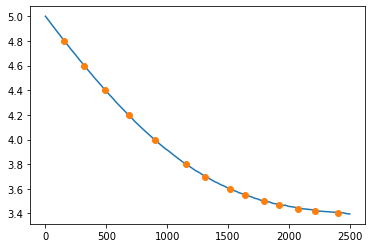

In [36]:
plot(sim.x_arr*ft_per_m, sim.fd*ft_per_m)
x_chow = array([155,318,493,684,898,1155,1314,1515,1641,1797,1917,2075,2214,2401])
fd_chow = array([4.8, 4.6, 4.4, 4.2, 4, 3.8, 3.7, 3.6, 3.55, 3.5, 3.47, 3.44, 3.42, 3.4])
plot(x_chow, fd_chow, 'o')


In [37]:
from scipy.interpolate import interp1d
f = interp1d(sim.x_arr*ft_per_m, sim.fd*ft_per_m)

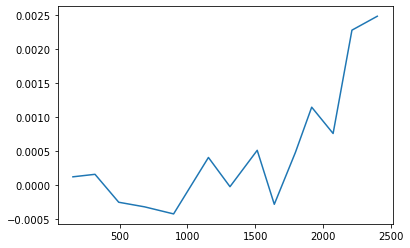

In [38]:
fd_mod = f(x_chow)

rel_err = (fd_mod - fd_chow)/fd_mod
plot(x_chow, rel_err)

In [14]:
fs = []
for xc in sim.xcs:
    fs.append(xc.f)
fs

[0.04779768656073045,
 0.04779768656073045,
 0.047854523090260614,
 0.047854523090260614,
 0.047854523090260614,
 0.047854523090260614,
 0.04791168901208248,
 0.04791168901208248,
 0.04791168901208248,
 0.04796918784839909,
 0.04796918784839909,
 0.04796918784839909,
 0.04796918784839909,
 0.0480270231755507,
 0.0480270231755507,
 0.0480270231755507,
 0.048085198625093806,
 0.048085198625093806,
 0.048085198625093806,
 0.04814371788490634,
 0.04814371788490634,
 0.04814371788490634,
 0.04814371788490634,
 0.04820258470032029,
 0.04820258470032029,
 0.04820258470032029,
 0.048261802875282124,
 0.048261802875282124,
 0.048261802875282124,
 0.048261802875282124,
 0.04832137627354215,
 0.04832137627354215,
 0.04832137627354215,
 0.04838130881987336,
 0.04838130881987336,
 0.04838130881987336,
 0.04838130881987336,
 0.0484416045013209,
 0.0484416045013209,
 0.0484416045013209,
 0.04850226736848299,
 0.04850226736848299,
 0.04850226736848299,
 0.04850226736848299,
 0.04856330153682414,
 0.04

In [3]:
xc = sim.xcs[0]
xc5 = sim.xcs[5]
xc20 = sim.xcs[20]

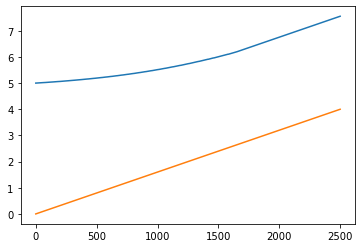

In [15]:
plot(sim.x_arr*ft_per_m, sim.h*ft_per_m)
plot(sim.x_arr*ft_per_m, sim.z_arr*ft_per_m)


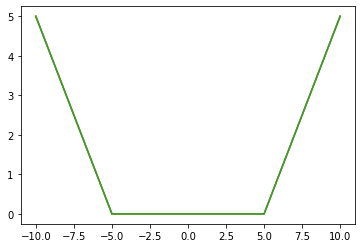

In [4]:
plot(xc.x, xc.y + sim.ymins[0])
plot(xc5.x, xc5.y)
plot(xc20.x, xc20.y)

In [12]:
sim.run_one_step()

In [5]:
sqrt(8)/1.5**2

1.257078722109418

In [6]:
2/0.25**(4/3)

12.699208415745595

In [7]:
(3.54/2.56)**(1/3) 
#Size of effect in friction slope from using
# only one f value to represent n.

1.1140921108647988

Need to enable friction factor to change with cross-section and to be set using Manning's n, which varies with D_H. However, could first try with fixed value, calculated below.

In [12]:
g = 9.8 * ft_per_m
R_h_approx = 2.7 # feet
K = 1.5
f = 8*g*Manning_n**2/K**2/R_h_approx**(1/3)
f

0.051297887908433246

In [25]:
np.size([1,2,3])

3